# Universidad Autónoma de Yucatán

## Facultad de Matemáticas

### Machine Learning

**Teacher:** Dr. Victor Uc Cetina

**Student:** Dayan Bravo Fraga

# Logistic Regression (Binary Classification)

## Download Corpus from GitHub (only for Colab)

In [1]:
import sys
import os

in_colab: bool = 'google.colab' in sys.modules
if in_colab:
    print('Is running in Colab')
    if not os.path.isfile('data.txt'):
        import gdown

        print("Downloading Data")
        url = "https://raw.githubusercontent.com/dayan3847/machine_learning/master/binary_classification/colab/data.txt"
        gdown.download(url, quiet=False)
else:
    print('Is not running in Colab')

Is not running in Colab


## Import libraries

In [2]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Import Data

In [3]:
data_points: np.ndarray = np.loadtxt('data.txt', delimiter=' ').T
data_points

array([[ 1.3  , -2.3  , -0.37 ,  0.49 ,  1.   , -1.9  ,  0.61 ,  1.4  ,
        -0.53 , -1.1  ,  0.64 , -0.76 ,  1.3  ,  0.93 ,  0.095,  0.44 ,
        -0.26 ,  2.8  ,  1.3  ,  0.1  ,  0.57 , -1.5  , -0.32 ,  0.19 ,
        -1.   , -0.35 , -0.4  , -1.7  ,  1.   , -0.56 , -0.054,  0.35 ,
         1.   ,  0.44 ,  0.26 , -0.36 , -0.86 , -0.27 , -0.27 ,  0.75 ,
         1.6  ,  0.76 ,  0.33 , -1.4  , -0.11 ,  0.37 ,  0.076, -1.4  ,
        -0.1  , -0.32 , -0.68 , -0.6  , -0.49 , -0.21 ,  0.057, -1.1  ,
        -1.8  , -0.67 ,  0.29 , -0.41 ,  1.8  ,  0.93 ,  0.74 , -1.2  ,
         0.84 ,  0.21 ,  0.5  , -0.21 , -0.11 ,  0.16 , -0.52 ,  0.42 ,
         1.1  , -0.5  ,  0.45 , -0.24 , -1.   ,  0.95 , -2.2  , -1.3  ,
        -1.6  ,  2.1  ,  0.86 ,  0.16 , -1.2  , -0.082,  0.078,  1.1  ,
        -1.2  , -0.2  , -2.2  , -0.75 , -1.6  ,  1.6  ,  0.34 ,  1.2  ,
         1.3  , -0.96 ,  1.7  , -0.77 ],
       [-0.54 , -2.5  , -0.047,  0.79 ,  0.95 , -1.7  , -0.3  ,  1.4  ,
         0.43 ,  0.14 ,

## Split data into training and test

In [4]:
data_train, data_test = train_test_split(data_points.T, test_size=.3, random_state=42)
data_train = data_train.T
data_test = data_test.T

## Plot Data Points

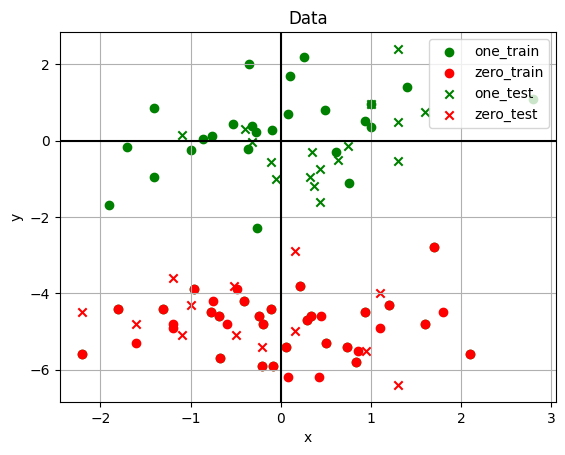

In [5]:
def plot_data(print_polynomial: bool = False):
    plt.title('Data')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.axvline(color='black')
    plt.axhline(color='black')

    index_zeros_train = np.where(data_train[2].astype(int) == 0)
    index_ones_train = np.where(data_points[2].astype(int) != 0)
    index_zeros_test = np.where(data_test[2].astype(int) == 0)
    index_ones_test = np.where(data_test[2].astype(int) != 0)
    # Data Points Train
    plt.scatter(data_train[0][index_ones_train], data_train[1][index_ones_train], color='green', label='one_train',
                marker='o')
    plt.scatter(data_train[0][index_zeros_train], data_train[1][index_zeros_train], color='red', label='zero_train',
                marker='o')
    # Data Points Test
    plt.scatter(data_test[0][index_ones_test], data_test[1][index_ones_test], color='green', label='one_test',
                marker='x')
    plt.scatter(data_test[0][index_zeros_test], data_test[1][index_zeros_test], color='red', label='zero_test',
                marker='x')

    if print_polynomial:
        polynomial = sp.sympify(str(get_polynomial()) + ' - 0.5')
        x_ = np.linspace(-3, 3)
        y_ = [sp.solve(polynomial.subs('x', x_i)) for x_i in x_]
        plt.plot(x_, y_, label='polynomial', color='blue', linestyle='-')

    plt.legend()
    plt.grid()
    plt.show()


plot_data()

# Logistic Regression

## Generate Thetas

In [6]:
def generate_thetas() -> np.ndarray:
    return np.random.uniform(low=-.01, high=.01, size=3)


thetas = generate_thetas()
thetas

array([ 0.00884634, -0.00015364, -0.00976999])

In [7]:
def get_polynomial() -> sp.Expr:
    return sp.sympify(f'{thetas[0]} * x + {thetas[1]} * y + {thetas[2]}')


get_polynomial()

0.008846338818542665*x - 0.00015363793571007006*y - 0.0097699941080489

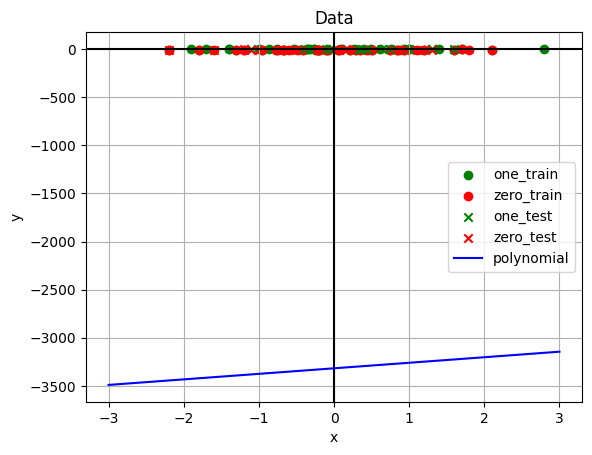

In [8]:
plot_data(True)

In [9]:
def sigmoid(x: float) -> float:
    return 1 / (1 + np.exp(-x))

In [10]:
def h(x_vector: np.ndarray) -> float:
    return thetas.dot(x_vector)

In [11]:
def h_activation(x_vector: np.ndarray) -> float:
    return sigmoid(h(x_vector))

In [12]:
def get_error(use_train_data: bool = False) -> float:
    d = data_train if use_train_data else data_test
    error = 0
    for data in d.T:
        yi = data[2]
        hi = h_activation(np.append(data[:2], 1))
        error += (hi - yi) ** 2
    return error / 2


get_error()

3.7423099884137794

In [13]:
def get_error_rms(use_train_data: bool = False) -> float:
    d = data_train if use_train_data else data_test
    e = get_error()
    m = d.shape[1]
    return (2 * e / m) ** .5


get_error_rms()

0.499487069463183

In [14]:
def get_accuracy(use_train_data: bool = False):
    d = data_train if use_train_data else data_test
    correct = 0
    for data in d.T:
        yi = data[2]
        hi = h_activation(np.append(data[:2], 1))
        if yi == 1 and hi >= .5:
            correct += 1
        elif yi == 0 and hi < .5:
            correct += 1
    return correct / d.shape[1]


get_accuracy()

0.5

### Training

In [15]:
iterations_count: int = 100
a: float = .1
errors = []
errors_test = []
accuracy = []
accuracy_test = []


def to_train():
    for _ in range(iterations_count):
        for data in data_train.T:
            x = np.append(data[:2], 1)
            y = data[2]
            hi = h_activation(x)
            a_x_y_m_hi = a * (y - hi)
            for i in range(3):  # len(thetas)
                # se actualiza el theta
                thetas[i] += a_x_y_m_hi * x[i]  # ^ 1
        errors.append(get_error_rms())
        errors_test.append(get_error_rms(True))
        accuracy.append(get_accuracy())
        accuracy_test.append(get_accuracy(True))


print('\033[92m' + 'training...' + '\033[0m')
to_train()
print('\033[92m' + 'training finished' + '\033[0m')

training...
training finished


# Results

## Error

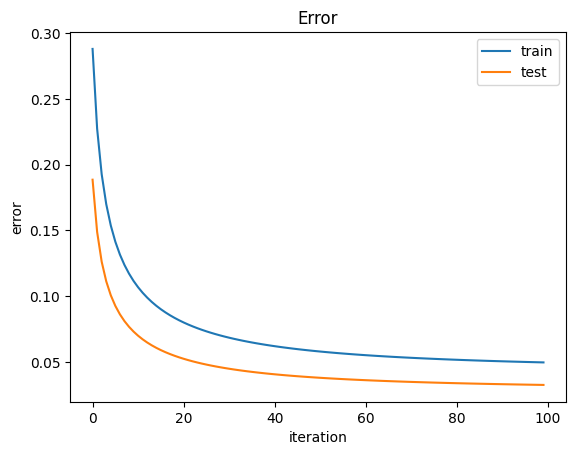

In [16]:
plt.title('Error')
plt.xlabel('iteration')
plt.ylabel('error')
plt.plot(errors, label='train')
plt.plot(errors_test, label='test')
plt.legend()
plt.show()

## Accuracy

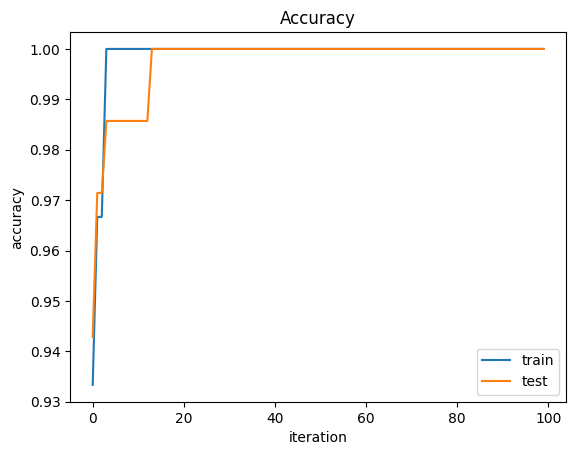

In [17]:
plt.title('Accuracy')
plt.xlabel('iteration')
plt.ylabel('accuracy')
plt.plot(accuracy, label='train')
plt.plot(accuracy_test, label='test')
plt.legend()
plt.show()

## Final Polinomial

In [18]:
get_polynomial()

-1.246142132978199*x + 3.0264789196719897*y + 7.585455813160586

## Final Polinomial Graph

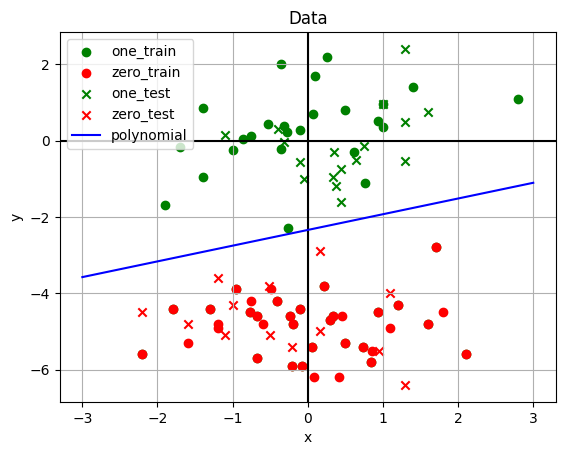

In [19]:
plot_data(True)